# Segmentasi Gambar dengan Clustering

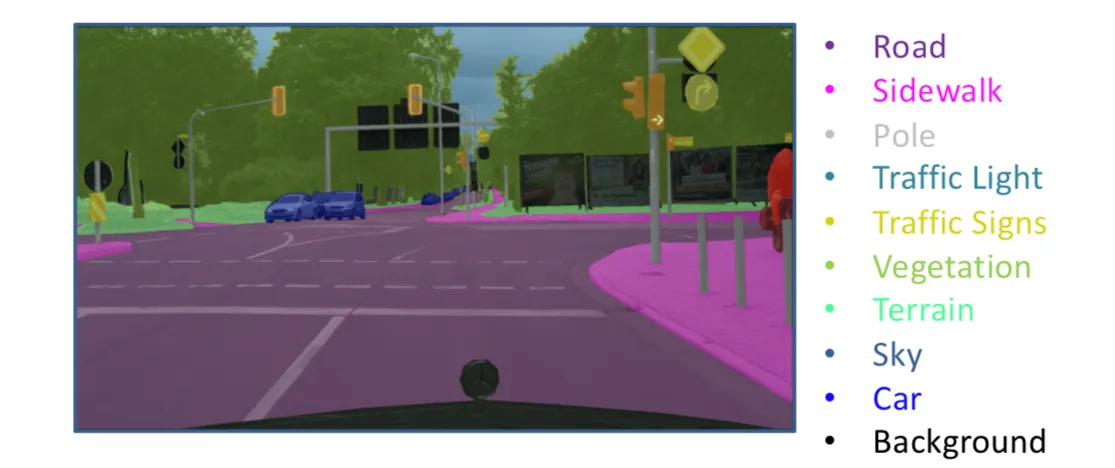

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

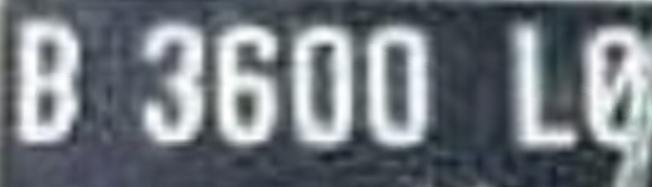

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [30]:
#Load Gambar

img_list = []

#load and append each img to the list
img_1 = cv2.imread('./img/1.jpg')
img_list.append(img_1)

img_2 = cv2.imread('./img/2.jpg')
img_list.append(img_2)

img_3 = cv2.imread('./img/3.jpg')
img_list.append(img_3)

img_4 = cv2.imread('./img/4.jpg')
img_list.append(img_4)

img_5 = cv2.imread('./img/5.jpg')
img_list.append(img_5)




In [31]:
h1, w1, ch1= img_1.shape
h2, w2, ch2= img_2.shape
h3, w3, ch3= img_3.shape
h4, w4, ch4= img_4.shape
h5, w5, ch5= img_5.shape

print(f"Image 1: Height = {h1}, Width = {w1}, Channels = {ch1}")
print(f"Image 2: Height = {h2}, Width = {w2}, Channels = {ch2}")
print(f"Image 3: Height = {h3}, Width = {w3}, Channels = {ch3}")
print(f"Image 4: Height = {h4}, Width = {w4}, Channels = {ch4}")
print(f"Image 5: Height = {h5}, Width = {w5}, Channels = {ch5}")



Image 1: Height = 298, Width = 1089, Channels = 3
Image 2: Height = 258, Width = 1101, Channels = 3
Image 3: Height = 343, Width = 1183, Channels = 3
Image 4: Height = 343, Width = 1183, Channels = 3
Image 5: Height = 324, Width = 1366, Channels = 3


In [32]:
def process_image(img):
    # Get image properties
    h, w, ch = img.shape

    # Normalize the image data
    data = img / 255.0

    data = data.reshape(h * w, ch)
    return data

data_1 = process_image(img_1)
data_2 = process_image(img_2)
data_3 = process_image(img_3)
data_4 = process_image(img_4)
data_5 = process_image(img_5)

print(f"Data 1 Shape = {data_1.shape}")
print(f"Data 2 Shape = {data_2.shape}")
print(f"Data 3 Shape = {data_3.shape}")
print(f"Data 4 Shape = {data_4.shape}")
print(f"Data 5 Shape = {data_5.shape}")


Data 1 Shape = (324522, 3)
Data 2 Shape = (284058, 3)
Data 3 Shape = (405769, 3)
Data 4 Shape = (405769, 3)
Data 5 Shape = (442584, 3)


In [33]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

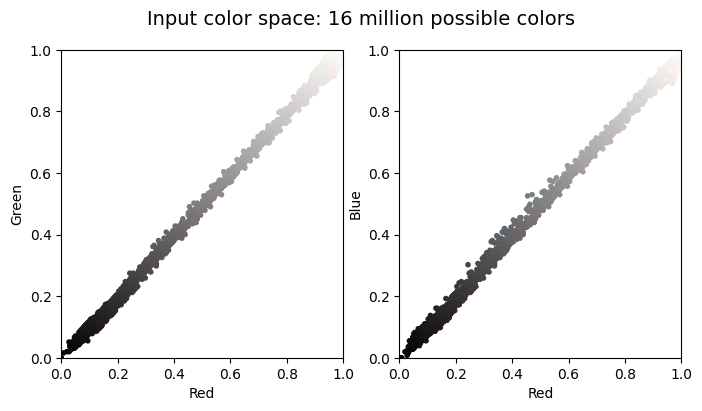

In [34]:
plot_pixels(data_1, title='Input color space: 16 million possible colors')

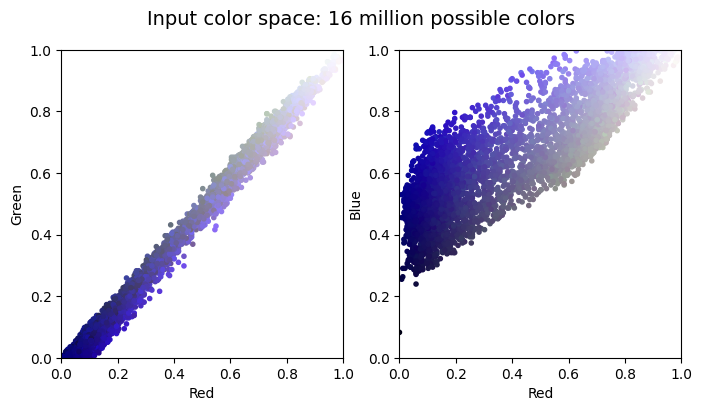

In [35]:
plot_pixels(data_2, title='Input color space: 16 million possible colors')

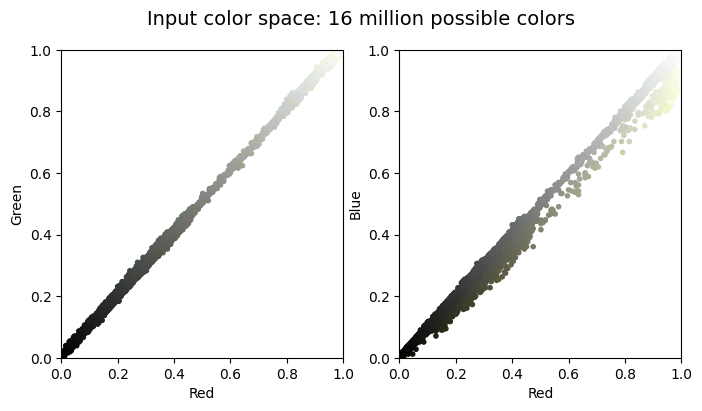

In [36]:
plot_pixels(data_3, title='Input color space: 16 million possible colors')

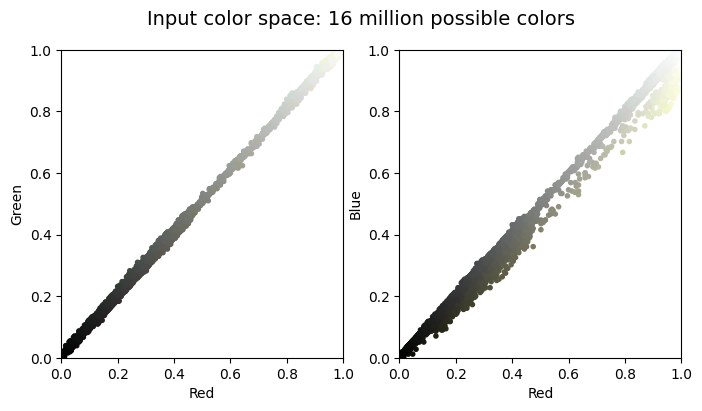

In [37]:
plot_pixels(data_4, title='Input color space: 16 million possible colors')

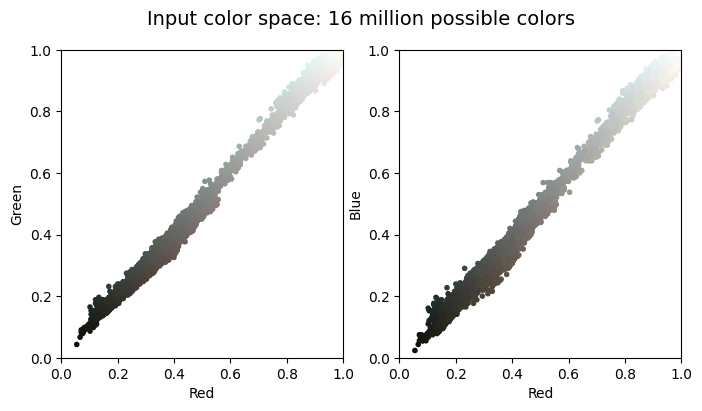

In [38]:
plot_pixels(data_5, title='Input color space: 16 million possible colors')

In [39]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
# Then convert to float type
# Create an empty list to store the processed pixel values
processed_pixel_vals_list = []

def reshape_pixel(img):
    # Reshape and convert pixel values to float32
    pixel_vals = img.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)

    # Append the processed pixel values to the list
    processed_pixel_vals_list.append(pixel_vals)

reshape_pixel(img_1)
reshape_pixel(img_2)
reshape_pixel(img_3)
reshape_pixel(img_4)
reshape_pixel(img_5)

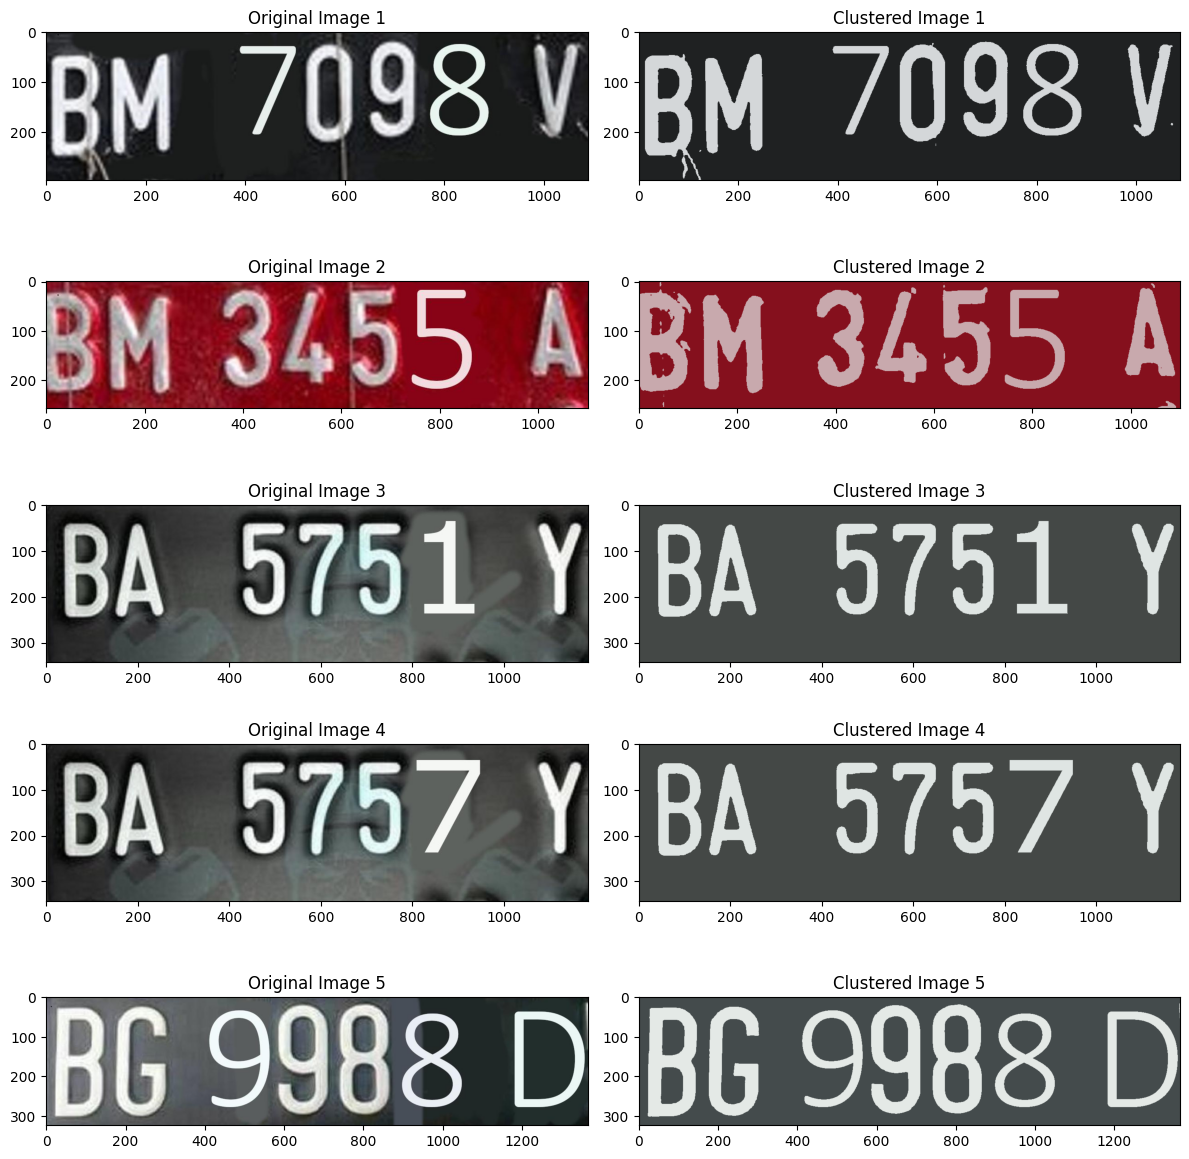

In [40]:
# K-means clustering parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2

# Create a figure to display all images
plt.figure(figsize=(12, 12))

for i, pixel_vals in enumerate(processed_pixel_vals_list):
    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((img_list[i].shape))

    # Display the original and clustered images in subplots
    plt.subplot(5, 2, 2 * i + 1)  # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {i + 1}')

    plt.subplot(5, 2, 2 * i + 2)  # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Clustered Image {i + 1}')

plt.tight_layout()
plt.show()

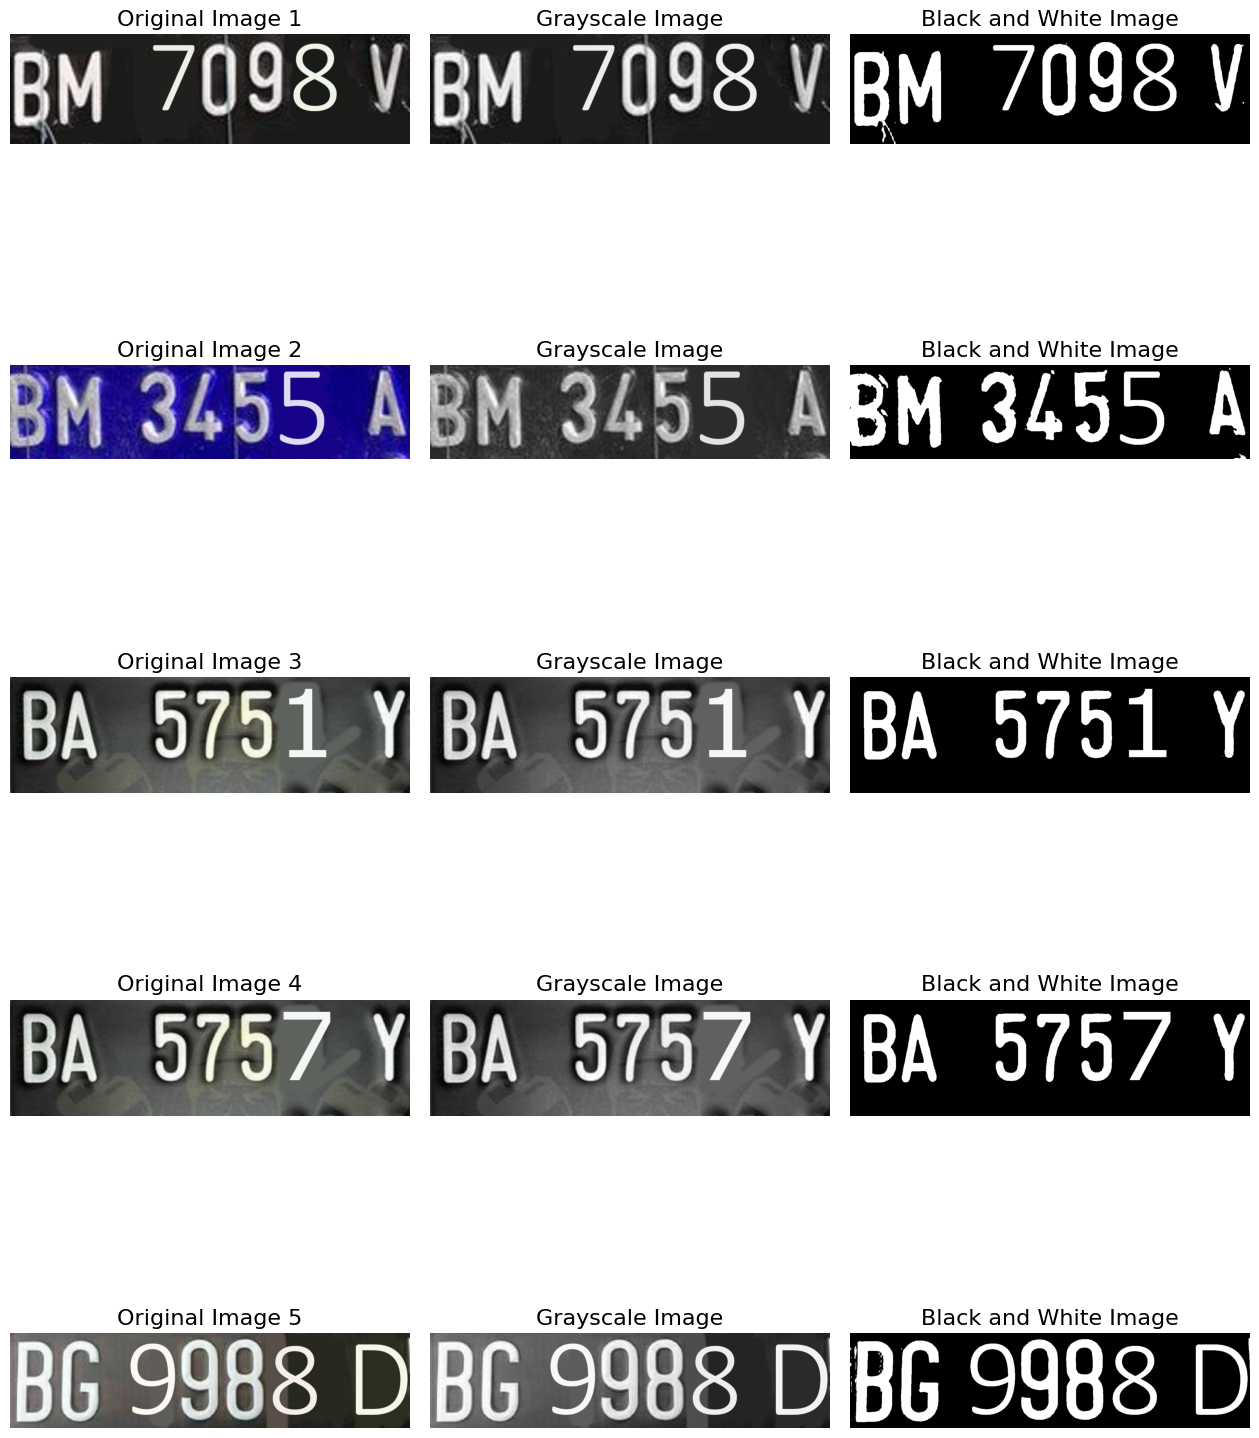

In [41]:
# import cv2
# import matplotlib.pyplot as plt

# Buat list untuk menyimpan gambar
img_list = []

# Tampilkan gambar asli, citra skala abu-abu, dan citra hitam putih untuk setiap gambar
fig, axes = plt.subplots(5, 3, figsize=(16, 20))
fig.subplots_adjust(wspace=0.05, hspace=0.3)

# Daftar variabel img_X
img_vars = [img_1, img_2, img_3, img_4, img_5]

for i in range(5):
    # Original Image (Grayscale)
    axes[i, 0].imshow(img_vars[i], cmap='gray', vmin=0, vmax=255)
    axes[i, 0].set_title(f'Original Image {i + 1}', size=16)
    axes[i, 0].axis('off')

    # Grayscale Image
    img_gray = cv2.cvtColor(img_vars[i], cv2.COLOR_BGR2GRAY)
    axes[i, 1].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
    axes[i, 1].set_title(f'Grayscale Image', size=16)
    axes[i, 1].axis('off')

    # Black and White Image
    _, img_bw = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    axes[i, 2].imshow(img_bw, cmap='gray', vmin=0, vmax=255)
    axes[i, 2].set_title(f'Black and White Image', size=16)
    axes[i, 2].axis('off')

plt.show()


# Evaluasi Hasil Segmentasi

1. Install library

In [42]:
import pytesseract
# Install pytesseract and Tesseract in Colab
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


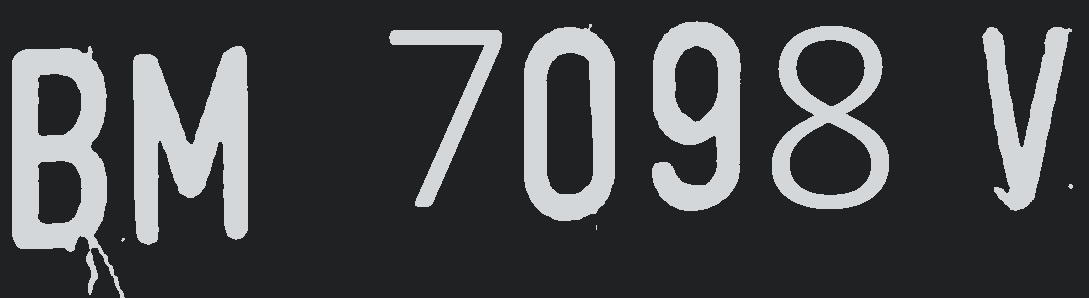

In [43]:
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(processed_pixel_vals_list[0], 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers_img_1 = np.uint8(centers)
segmented_data_img_1 = centers_img_1[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image_img_1 = segmented_data_img_1.reshape((img_1.shape))

# Display the grayscale segmented image
cv2_imshow(segmented_image_img_1)

In [44]:
# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(segmented_image_img_1, lang='eng')

# Ground truth license plate characters
# ground_truth = 'BM 7098 V'  # Replace with actual ground truth

ground_truth = 'BM 7098 V'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

Ground Truth: BM 7098 V
Recognized Text: BM 7098 V

Character Recognition Accuracy: 100.00%


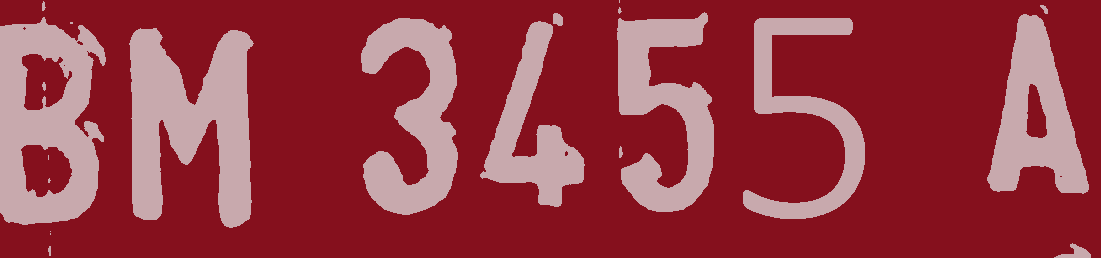

Ground Truth: BM 3455 A
Recognized Text: BM 3455 A

Character Recognition Accuracy: 100.00%


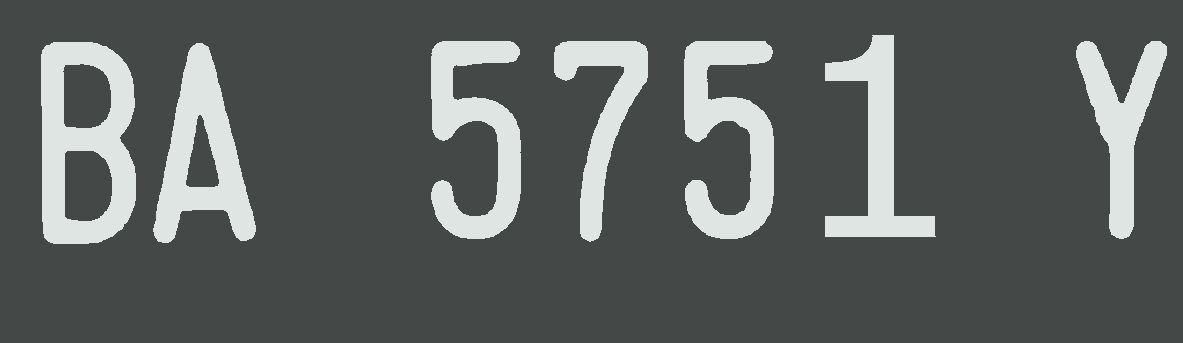

Ground Truth: BA 5751 Y
Recognized Text: BA 9/ol Y

Character Recognition Accuracy: 55.56%


In [45]:
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(processed_pixel_vals_list[1], 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers_img_2 = np.uint8(centers)
segmented_data_img_2 = centers_img_2[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image_img_2 = segmented_data_img_2.reshape((img_2.shape))

# Display the grayscale segmented image
cv2_imshow(segmented_image_img_2)

# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(segmented_image_img_2, lang='eng')

# Ground truth license plate characters
# ground_truth = 'BM 7098 V'  # Replace with actual ground truth

ground_truth = 'BM 3455 A'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')


# Perform k-means clustering
retval, labels, centers = cv2.kmeans(processed_pixel_vals_list[2], 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers_img_3 = np.uint8(centers)
segmented_data_img_3 = centers_img_3[labels.flatten()]

# Reshape data into the original image dimensions
segmented_image_img_3 = segmented_data_img_3.reshape((img_3.shape))

# Display the grayscale segmented image
cv2_imshow(segmented_image_img_3)

# Perform OCR to recognize characters
recognized_text = pytesseract.image_to_string(segmented_image_img_3, lang='eng')

# Ground truth license plate characters
# ground_truth = 'BM 7098 V'  # Replace with actual ground truth

ground_truth = 'BA 5751 Y'  # Replace with actual ground truth

# Calculate character recognition accuracy
correct_characters = 0
for gt_char, rec_char in zip(ground_truth, recognized_text):
    if gt_char == rec_char:
        correct_characters += 1

total_characters = len(ground_truth)
accuracy = correct_characters / total_characters * 100.0

print(f'Ground Truth: {ground_truth}')
print(f'Recognized Text: {recognized_text}')
print(f'Character Recognition Accuracy: {accuracy:.2f}%')

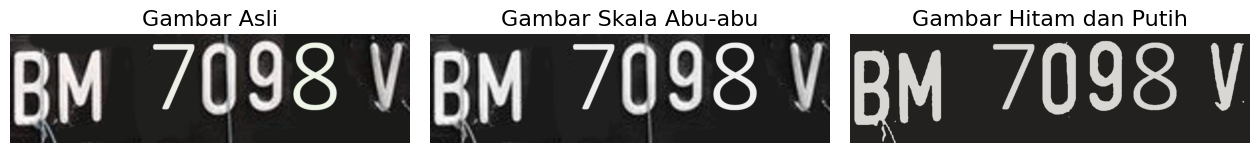

Ground Truth: BM 7098 V
Teks yang Dikenali: BM 7098 V

Akurasi Pengenalan Karakter: 100.00%


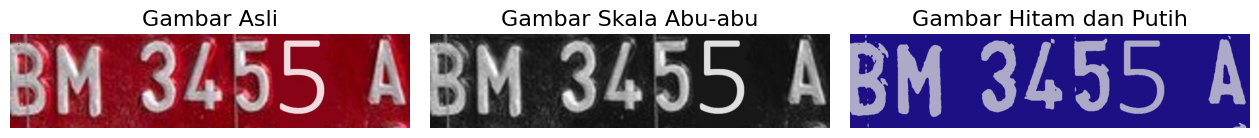

Ground Truth: BM 3455 A
Teks yang Dikenali: BM 3455 A

Akurasi Pengenalan Karakter: 100.00%


In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Mendefinisikan fungsi untuk menampilkan gambar
def tampilkan_gambar(img, img_abu_abu, img_hitam_putih):
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    fig.subplots_adjust(wspace=0.05)

    # Gambar Asli (Grayscale)
    axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Gambar Asli', size=16)
    axes[0].axis('off')

    # Gambar Skala Abu-abu
    axes[1].imshow(img_abu_abu, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Gambar Skala Abu-abu', size=16)
    axes[1].axis('off')

    # Gambar Hitam dan Putih
    axes[2].imshow(img_hitam_putih, cmap='gray', vmin=0, vmax=255)
    axes[2].set_title('Gambar Hitam dan Putih', size=16)
    axes[2].axis('off')

    plt.show()

# Mendefinisikan daftar ground truth untuk setiap gambar
# ground_truths = ['BM 7098 V', 'BM 3455 A', 'BA 5751 Y', 'BA 5757 A', 'BG 9888 D']
ground_truths = ['BM 7098 V', 'BM 3455 A']

# Memproses setiap gambar
for i in range(2):  # Ubah rentang sesuai dengan jumlah gambar Anda
    # Melakukan clustering dengan algoritma K-Means
    retval, labels, centers = cv2.kmeans(processed_pixel_vals_list[i], 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Mengonversi data menjadi nilai 8-bit
    centers_img = np.uint8(centers)
    segmented_data_img = centers_img[labels.flatten()]

    # Mereshape data ke dimensi gambar asli
    segmented_image_img = segmented_data_img.reshape((img_vars[i].shape))

    # Jika ini adalah gambar kedua (indeks 1), perbaiki warna menjadi merah
    if i == 1:
        # Mengambil warna merah dari gambar asli
        blue_channel = img_vars[i][:, :, 0]
        green_channel = img_vars[i][:, :, 1]
        red_channel = img_vars[i][:, :, 2]

        # Menggabungkan kanal merah dengan kanal hijau dan biru yang sama
        img_vars[i] = cv2.merge([red_channel, green_channel, blue_channel])

    # Mengonversi gambar asli ke skala abu-abu
    img_abu_abu = cv2.cvtColor(img_vars[i], cv2.COLOR_BGR2GRAY)

    # Menampilkan gambar skala abu-abu yang telah diproses
    tampilkan_gambar(img_vars[i], img_abu_abu, segmented_image_img)

    # Melakukan OCR untuk mengenali karakter
    recognized_text = pytesseract.image_to_string(segmented_image_img, lang='eng')

    # Ground truth karakter plat nomor
    ground_truth = ground_truths[i]  # Menggunakan ground truth yang sesuai

    # Menghitung akurasi pengenalan karakter
    karakter_benar = 0
    for karakter_gt, karakter_rec in zip(ground_truth, recognized_text):
        if karakter_gt == karakter_rec:
            karakter_benar += 1

    total_karakter = len(ground_truth)
    akurasi = karakter_benar / total_karakter * 100.0

    print(f'Ground Truth: {ground_truth}')
    print(f'Teks yang Dikenali: {recognized_text}')
    print(f'Akurasi Pengenalan Karakter: {akurasi:.2f}%')
